## Report Outline

In [1]:
# import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# import the dfm_basics_rate data
dfm_basics_rate = pd.read_csv('data/dfm_basics_rate.csv')
print(dfm_basics_rate.shape)
dfm_basics_rate.head(2)

(69119, 10)


,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres1,genres2,genres3
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,NaN


In [8]:
# import the df_budgets_tn data
df_budgets_tn = pd.read_csv('data/df_budgets_tn.csv')
print(df_budgets_tn.shape)
df_budgets_tn.sample(2)

(5698, 5)


,release_date,movie,production_budget,domestic_gross,worldwide_gross
4021,2001-11-30,Behind Enemy Lines,40000000,58855732,58855732
4990,1994-09-23,Exotica,1500000,5046118,5046118


In [9]:
# import the dfm_basics_rate data
df_budg_gros = pd.read_csv('data/df_budg_gros.csv')
print(df_budg_gros.shape)
df_budg_gros.head(2)

(1238, 6)


,movie,production_budget,domestic_gross_x,worldwide_gross,studio,year
0,Destroyer,9000000,1533324,3681096,Annapurna,2018
1,Vice,60000000,47836282,70883171,Annapurna,2018


In [42]:
# import the bom.movie_gross data
df_studios = pd.read_csv('data/bom.movie_gross.csv')
print(df_studios.shape)
df_studios.head(2)

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


### Data Background
Here we will explore some metrics to understand the film undustry:
- which genres are big?
- which movie studios are big?
- how long does a typical movie last?
- how many movies are produced each year?

### Which Genres Are Big?
The top 3 genres (Drama, Comedy and Documentary) make up over half of the movies produced

In [22]:
g = round(dfm_basics_rate.genres1.value_counts(normalize=True) * 100, 1).head(11)
print(g)

Drama          25.0
Comedy         20.5
Documentary    19.1
Action          9.6
Horror          6.1
Biography       4.8
Adventure       3.6
Crime           3.4
Thriller        2.0
Animation       1.3
Romance         1.1
Name: genres1, dtype: float64


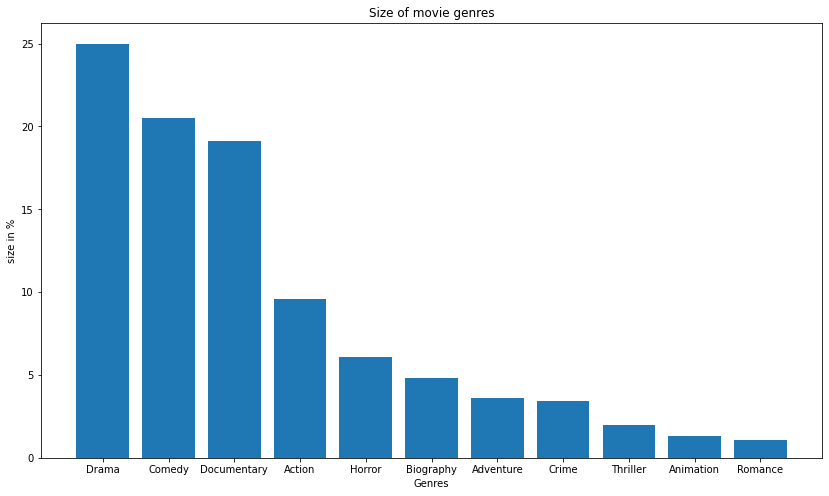

In [40]:
y = list(g.values)
x = list(g.index)

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.xlabel('Genres')
plt.ylabel('size in %')
plt.title('Size of movie genres');

### Which Movie Studios Are Big?
The movie industry has many movie studios, totaling to 258 in our data. The plot below shows the size of movie studios based on the number of movies they have produced. This means there is no dominant market leader, with IFC, Universal, Warner Brothers, Fox and Magnet competing at the top

In [50]:
s = round(df_studios.studio.value_counts(normalize=True) * 100, 1).head(20)
print('Total # of studios: ', len(df_studios.studio.unique()))
print('\n')
print(s)


Total # of studios:  258


IFC       4.9
Uni.      4.3
WB        4.1
Fox       4.0
Magn.     4.0
SPC       3.6
Sony      3.3
BV        3.1
LGF       3.0
Par.      3.0
Eros      2.6
Wein.     2.3
CL        2.2
Strand    2.0
FoxS      2.0
RAtt.     2.0
KL        1.8
Focus     1.8
WGUSA     1.7
CJ        1.7
Name: studio, dtype: float64


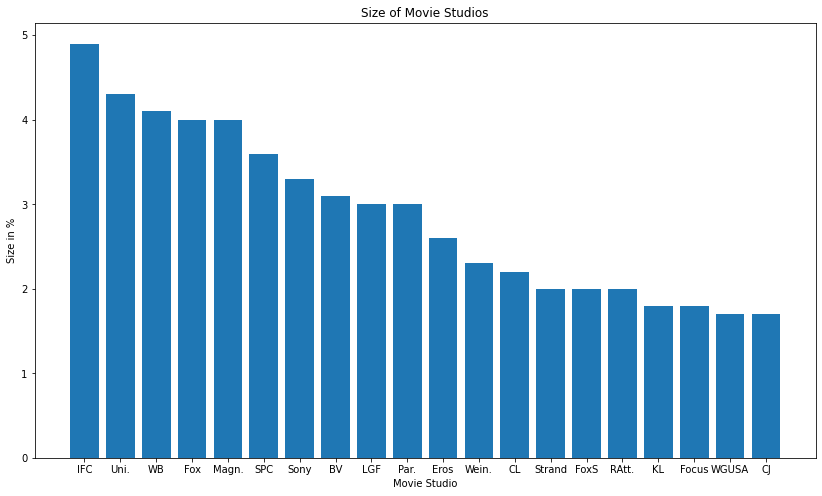

In [46]:
y = list(s.values)
x = list(s.index)

plt.figure(figsize=(14, 8))
plt.bar(x, y)
plt.xlabel('Movie Studio')
plt.ylabel('Movies Produced in %')
plt.title('Size of Movie Studios');

### How Long does a typical movie last?
A typical movie will last around 100 minutes. However, there are those that will last slightly under 50 minutes or upto 250 minutes

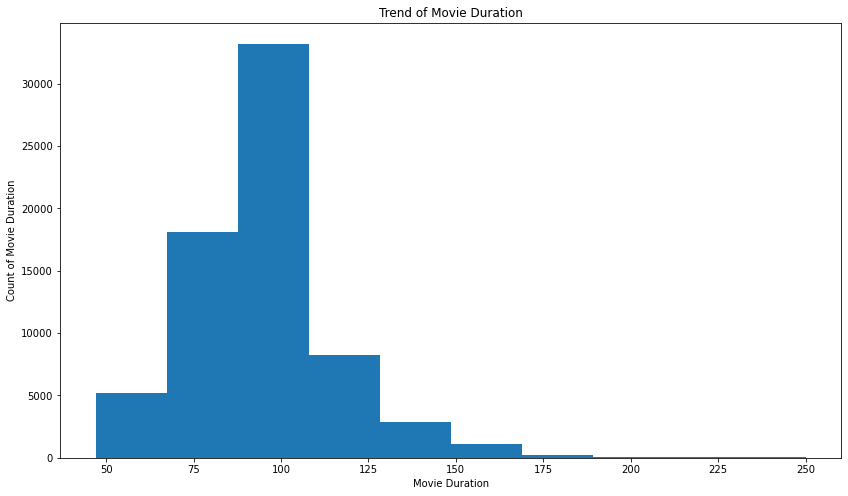

In [51]:
plt.figure(figsize=(14, 8))
plt.hist(dfm_basics_rate.runtime_minutes)
plt.xlabel('Movie Duration (Minutes)')
plt.ylabel('Count of Movie Duration')
plt.title('Trend of Movie Duration in Minutes');